In [1]:
import torch
import pandas as pd
import seaborn as sns
from training.spikes_trainer import TrainerSpikesSignalRetrieval
from common import ConfigSpikesTrainer, DataSpikesBatch, InferredSpikesBatch, \
    LossesSpikesImages, NumpyBatch, TensorBatch

In [2]:
config_path = 's3://data-clearml/phase-spikes-retrieval/2022_12_27_22_11_27-sparse-spikes-prediction-spikes-generator-ae-conv-recon-spikes-signals-2_8spikes.7a9a5761aade4c79b2afe8102d1ec091/artifacts/config-trainer/config-trainer.json'

In [3]:
config_path

's3://data-clearml/phase-spikes-retrieval/2022_12_27_22_11_27-sparse-spikes-prediction-spikes-generator-ae-conv-recon-spikes-signals-2_8spikes.7a9a5761aade4c79b2afe8102d1ec091/artifacts/config-trainer/config-trainer.json'

In [4]:
model_path='s3://data-clearml/phase-spikes-retrieval/2022_12_27_22_11_27-sparse-spikes-prediction-spikes-generator-ae-conv-recon-spikes-signals-2_8spikes.7a9a5761aade4c79b2afe8102d1ec091/models/phase-retrieval-spikes-pred-model-34.pt'

In [5]:
model_path

's3://data-clearml/phase-spikes-retrieval/2022_12_27_22_11_27-sparse-spikes-prediction-spikes-generator-ae-conv-recon-spikes-signals-2_8spikes.7a9a5761aade4c79b2afe8102d1ec091/models/phase-retrieval-spikes-pred-model-34.pt'

In [6]:
config = ConfigSpikesTrainer.load_config(config_path, path_pretrained=model_path)

/data/code/spectral-phase-retrieval/common/configs.py:87: UserWarning: Not valid name: ['log_path'], will be removed from config dict
  warnings.warn(f'Not valid name: {non_valid_keys}, will be removed from config dict')


In [7]:
print(config)


[ConfigSpikesTrainer -----
 o batch_size_test                               | 32
 o batch_size_train                              | 16
 o count_predictor_head                          | False
 o cuda                                          | True
 o dataset_name                                  | spikes-generator
 o dbg_img_batch                                 | 8
 o debug_mode                                    | False
 o fft_norm                                      | ortho
 o gauss_noise                                   | 0.005
 o image_size                                    | 32
 o lambda_count_spikes                           | 2.0
 o lambda_fft_recon                              | 2.0
 o lambda_img_recon                              | 20.0
 o lambda_sparsity                               | 0.1
 o lambda_support_size                           | 1.0
 o log_eval_interval                             | 5000
 o log_image_interval                            | 5000
 o log_interval  

In [8]:
eval_img32_2_8spikes = TrainerSpikesSignalRetrieval(config=config, 
                                                    experiment_name='eval-img32-2_8spikes', 
                                                    eval_only=True)

DEBUG:TrainerSpikesSignalRetrieval:Config params: 
 
[ConfigSpikesTrainer -----
 o batch_size_test                               | 32
 o batch_size_train                              | 16
 o count_predictor_head                          | False
 o cuda                                          | True
 o dataset_name                                  | spikes-generator
 o dbg_img_batch                                 | 8
 o debug_mode                                    | False
 o fft_norm                                      | ortho
 o gauss_noise                                   | 0.005
 o image_size                                    | 32
 o lambda_count_spikes                           | 2.0
 o lambda_fft_recon                              | 2.0
 o lambda_img_recon                              | 20.0
 o lambda_sparsity                               | 0.1
 o lambda_support_size                           | 1.0
 o log_eval_interval                             | 5000
 o log_image_interval

In [9]:
eval_metrics, n_spikes = eval_img32_2_8spikes.eval_model()

4000it [00:48, 83.06it/s]                        


In [14]:
n_spikes = n_spikes.flatten()

In [21]:
n_spikes.shape

(128000,)

In [15]:
eval_metrics

LossesSpikesImages(img_recon=tensor([0.0871, 0.0603, 0.0793,  ..., 0.0494, 0.0521, 0.0834], device='cuda:0'), img_sparsity=tensor([0.0046, 0.0046, 0.0043,  ..., 0.0048, 0.0041, 0.0047], device='cuda:0'), fft_recon=tensor([0.0474, 0.0463, 0.0422,  ..., 0.0323, 0.0181, 0.0506], device='cuda:0'), count_pred_loss=None, support_size=tensor([0.0564, 0.0574, 0.0376,  ..., 0.0404, 0.0393, 0.0564], device='cuda:0'), total=tensor([1.8932, 1.3557, 1.7088,  ..., 1.0939, 1.1186, 1.8264], device='cuda:0'), lr=None)

In [16]:
eval_metrics.get_keys()

['img_recon',
 'img_sparsity',
 'fft_recon',
 'count_pred_loss',
 'support_size',
 'total',
 'lr']

In [19]:
eval_metrics_df = pd.DataFrame(eval_metrics.to_numpy_dict())
eval_metrics_df = eval_metrics_df[eval_metrics_df.notnull()].dropna(axis=1)

In [20]:
eval_metrics_df['n_spikes'] = n_spikes

ValueError: Length of values (128000) does not match length of index (4000)

In [18]:
eval_metrics_df

,img_recon,img_sparsity,fft_recon,support_size,total
0,0.087080,0.004573,0.047359,0.056391,1.893164
1,0.060265,0.004585,0.046264,0.057396,1.355681
2,0.079319,0.004348,0.042200,0.037621,1.708827
3,0.074625,0.004392,0.024728,0.028625,1.571011
4,0.075896,0.004011,0.045928,0.054352,1.664523
...,...,...,...,...,...
3995,0.059385,0.004220,0.018642,0.036282,1.261690
3996,0.065080,0.004483,0.021800,0.038893,1.384533
3997,0.049418,0.004754,0.032325,0.040399,1.093876
3998,0.052141,0.004143,0.018065,0.039271,1.118636


In [27]:
eval_metrics_df.describe()

,img_recon,img_sparsity,fft_recon,support_size,total
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.070078,0.004377,0.032071,0.039242,1.505375
std,0.013909,0.000294,0.012111,0.011338,0.289046
min,0.027403,0.003403,0.003333,0.014954,0.615412
25%,0.060440,0.004168,0.023142,0.031094,1.305955
50%,0.069523,0.004376,0.030981,0.037372,1.496931
75%,0.079129,0.004566,0.039757,0.045389,1.692831
max,0.123393,0.005461,0.091421,0.115913,2.639359


In [31]:
# g = sns.pairplot(eval_metrics_df, vars = ['dist_Amazon-Rekognition','dist_Microsoft-Cognitive-Face'], hue="identical")


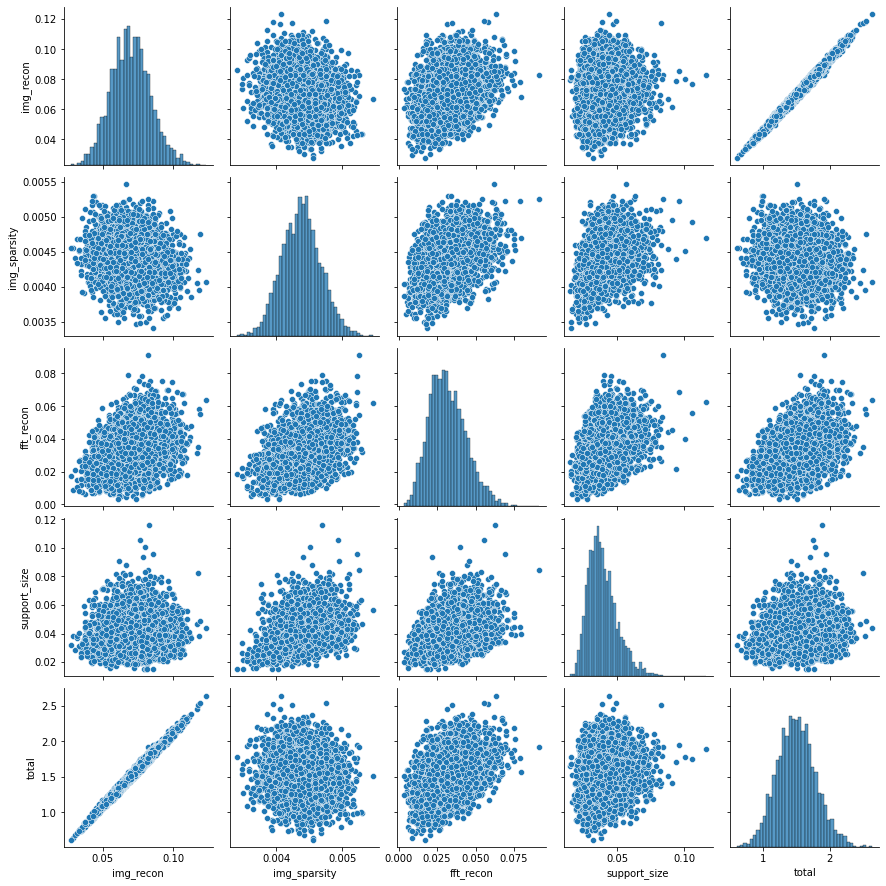

In [30]:
g = sns.pairplot(eval_metrics_df)